# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib.request,urllib.parse,urllib.error
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set counts for printing of records
count = 0
group = 1
city_list = []

#create loop for data to generate dataframe
print("------------------------------\nBegin Data Retrieval\n------------------------------\n")

for city in cities:
    count += 1
    
    print(f"Processing record {count} of Set {group} | {city}")
    
    if count == 50:
        count = 0
        group += 1
   
    url= f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial"
    response = requests.get(url).json()
    
    try:
        city_list.append({
            'City': city,
            'Lat': response['coord']['lat'],
            'Lon':response['coord']['lon'],
            'Maximum Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
        })
    
    except Exception:
        print("City not found. Skipping...")
        pass
print("------------------------------\nRetrieval of Data: Completed\n------------------------------")        

------------------------------
Begin Data Retrieval
------------------------------

Processing record 1 of Set 1 | ushuaia
Processing record 2 of Set 1 | husavik
Processing record 3 of Set 1 | saint-philippe
Processing record 4 of Set 1 | rikitea
Processing record 5 of Set 1 | pitimbu
Processing record 6 of Set 1 | hithadhoo
Processing record 7 of Set 1 | punta arenas
Processing record 8 of Set 1 | ferrol
Processing record 9 of Set 1 | obo
Processing record 10 of Set 1 | kudahuvadhoo
Processing record 11 of Set 1 | richards bay
Processing record 12 of Set 1 | tasiilaq
Processing record 13 of Set 1 | wufeng
Processing record 14 of Set 1 | tumannyy
City not found. Skipping...
Processing record 15 of Set 1 | sao francisco de paula
Processing record 16 of Set 1 | baykit
Processing record 17 of Set 1 | winnemucca
Processing record 18 of Set 1 | bluff
Processing record 19 of Set 1 | taman
Processing record 20 of Set 1 | barrow
Processing record 21 of Set 1 | lavrentiya
Processing record 22 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame(city_list)
weather_data

,City,Lat,Lon,Maximum Temp,Humidity,Cloudiness,Wind,Country,Date
0,ushuaia,-54.8000,-68.3000,51.80,76,40,18.41,AR,1612657769
1,husavik,66.0449,-17.3389,32.00,74,75,3.44,IS,1612657742
2,saint-philippe,-21.3585,55.7679,78.80,73,75,6.91,RE,1612657769
3,rikitea,-23.1203,-134.9692,78.67,69,100,9.84,PF,1612657769
4,pitimbu,-7.4706,-34.8086,78.80,83,20,4.61,BR,1612657770
...,...,...,...,...,...,...,...,...,...
558,taree,-31.9000,152.4667,80.60,65,40,10.36,AU,1612657862
559,ipoti,7.8738,5.0769,70.00,48,100,3.53,NG,1612657862
560,inuvik,68.3499,-133.7218,-18.40,76,100,4.61,CA,1612657862
561,adrasmon,40.6472,69.9856,46.40,66,40,17.90,TJ,1612657862


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
#Use describe function to see values for setting limits
weather_data.describe()

,Lat,Lon,Maximum Temp,Humidity,Cloudiness,Wind,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.867216,20.357496,48.552877,73.992895,51.365897,7.982345,1.612658e+09
std,34.065264,92.118745,32.443973,19.140610,40.530833,5.594034,8.245754e+01
min,-54.800000,-179.166700,-39.570000,5.000000,0.000000,0.430000,1.612657e+09
25%,-8.422900,-58.186300,28.000000,65.000000,3.000000,3.610000,1.612658e+09
50%,23.216700,24.731400,59.000000,79.000000,58.000000,6.910000,1.612658e+09
75%,49.141650,102.257100,74.905000,88.000000,90.500000,11.240000,1.612658e+09
max,78.218600,179.316700,88.000000,100.000000,100.000000,30.780000,1.612658e+09


## Latitude vs. Temperature Plot

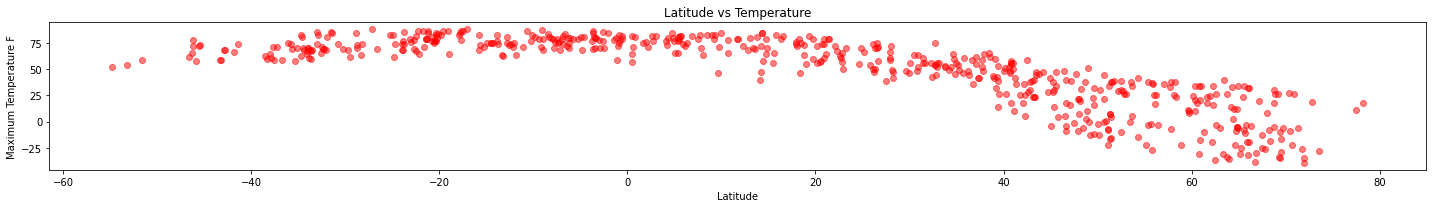

In [6]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(20,3))
plt.scatter(weather_data["Lat"], weather_data["Maximum Temp"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature F")
plt.tight_layout()
plt.savefig("../Output/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

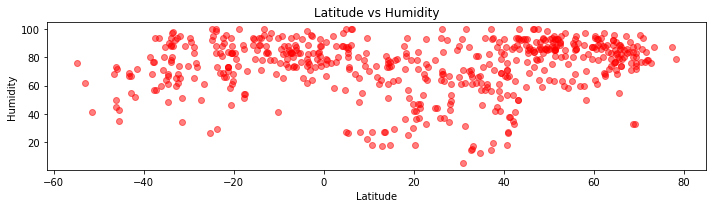

In [33]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(10,3))
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.savefig("../Output/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

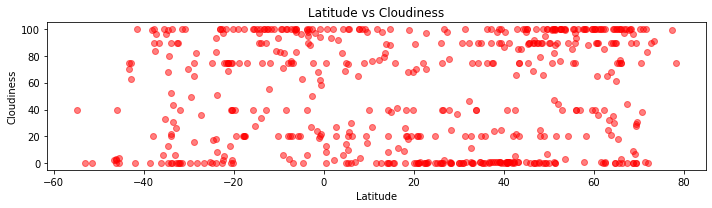

In [34]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(10,3))
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("../Output/lat_vs_clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

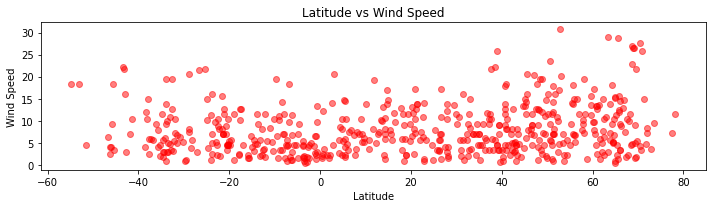

In [35]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(10,3))
plt.scatter(weather_data["Lat"], weather_data["Wind"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.savefig("../Output/lat_vs_wind.png")
plt.show()

## Linear Regression

In [31]:
#Separate data into hemispheres for following regression charts.
northern_lat = 
southern_lat = weather_data["Lat"] 


AttributeError: 'DataFrame' object has no attribute 'locf'

In [ ]:
northern_hum = weather_data["Humidity"] > -1
southern_hum = weather_data["Humidity"] < 1
northern_cloud = weather_data["Cloudiness"] > -1
southern_cloud = weather_data["Cloudiness"] < 1
northern_wind = weather_data["Wind"] > -1
southern_wind = weather_data["Wind"] < 1

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

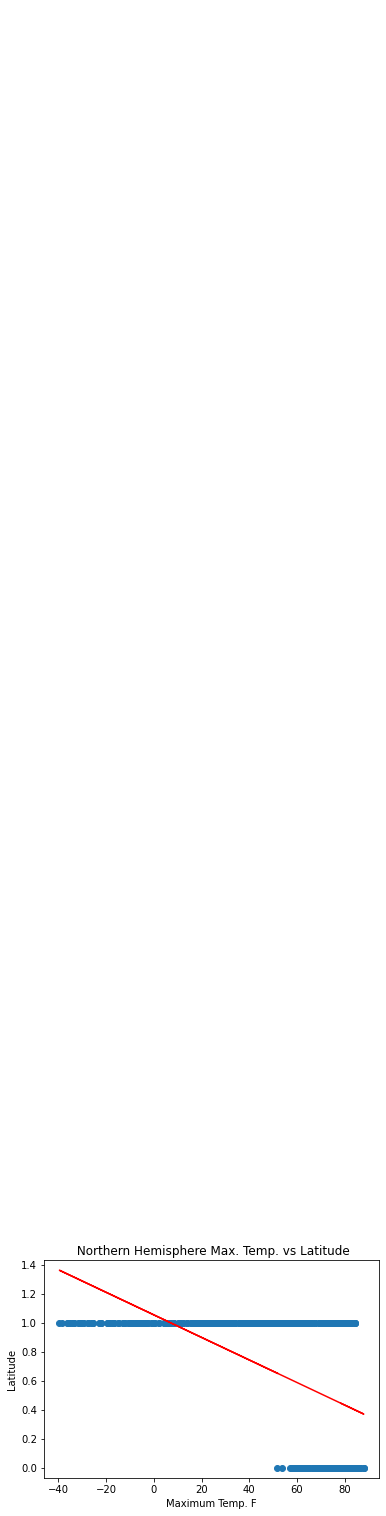

In [26]:
# generate linear regression with scatterplot
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data["Maximum Temp"], northern_lat)
regress_values = weather_data["Maximum Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["Maximum Temp"],northern_lat)
plt.plot(weather_data["Maximum Temp"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Maximum Temp. F')
plt.ylabel('Latitude')
plt.title(" Northern Hemisphere Max. Temp. vs Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression